<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Assignment 3</strong></h1>

Comprehensive data preparation, exploration, visualization, feature engineering, and classification modeling for a case study: Predict house price range in Hanoi 2019 and 2020 periods.


<b> Group: 10</b>
+ Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
+ Student Name: Tran Ngoc Anh Thu (s3879312)</b>
+ Student Name: Ho Le Minh Thach (s3879312)</b>
+ Student Name: Do Hoang Duc (s3788345)</b>
+ Lecturer: Vo Ngoc Yen Nhi </b>

Having played a vital role in the human-being life, housing is one of the greatest considerations and its price has been researched carefully in millions of studies by using machine learning. Although, this is not the rare topic, it is still necessary to construct a machine learning model in order to not only predict an accurate housing price but also have the user-friendliness for the users to have the most optimised and effective way to investigate the housing price for improving the living standard.

# Hypothesis forming:


<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

### 1. [General Requirement](#1)

1.1 [Overview](#1.1)

1.2 [Required  Libraries](#1.2)

<br>

### 2. [Data Preparation & Data exploration (EDA)](#2)

2.1 [Data Preparation](#2.1)

2.2 [Check data types & Make the data homogeneous](#2.2)

2.3 [Missing Values](#2.3)
+ [Guess the missingness type](#2.3.1)
+ [Drop missing values pairwise for df and validation set by deleting their rows](#2.3.2)
+ [Drop missing values listwise for all the datasets by deleting their columns](#2.3.3)
+ [Interpolate() - Nearest Value imputation for Weather_Timestamp](#2.3.4)
+ [Median & Frequent Categorical Imputation for Weather Continuous features](#2.3.5)
+ [Impute Median and Mode for the rest- assume that there is random order of missing values](#2.3.6)

2.4 [Shorten and Simplify categories](#2.4)
+ [2.4.1 Time-series columns - break them down into hour, minute, and weekday](#2.4.1)
+ [2.4.2 Shorten & Simplify the Wind Direction](#2.4.2)

2.5 [Typos](#2.5)
+ [2.5.1 Check for typos in the dataset](#2.5.1)
+ [2.5.2 Extra-whitespaces](#2.5.2)
+ [2.5.3 Lower-case all values in each column](#2.5.3)

2.6 [Sanity checks](#2.6)
+ [2.6.1 Check duplication](#2.6.1)
+ [2.6.2 Impossible values](#2.6.2)

2.7 [Extra exploration and visualization](#2.7)
+ [2.7.1 Medium distance by severity bar chart](#2.7.1)
+ [2.7.2 Top 10 states having the most accidents bar chart](#2.7.2)
+ [2.7.3 Longtitude and Latitude Scatterplot](#2.7.3)
+ [2.7.4 Most frequent POI Attributes of an accident with severity bar chart](#2.7.4)

<br>

### 3. [Feature Engineering](#3)
3.1 [Data Correlation - Quantify the association of features and accidents](#3.1)

3.2 [Gaussian Distributions - Box Cox OR Log Transformation of skewed features](#3.2)

3.3 [Assumptions of Regression](#3.3)

3.4 [Multicollinearity of Features](#3.4)

3.5 [Drop multicollinearity features and high p-value](#3.5)

3.6 [Encoding](#3.6)

3.7 [Check OLS stats model - Multivariate - Interpretation of the Model Coefficient, the P-value, the R-squared](#3.7)

3.8 [df - Test - Validation Sets](#3.8)

3.9 [Feature scaling](#3.9)

<br>

### 4. [Model dfing](#4)

<br>

### 5. [Model comparison and export](#5)

<br>

### 6. [Summary](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Data Preparation</strong></h1>

<a id="1.1"></a>
# 1.1 Importing Necessary Libraries and datasets

In [ ]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno

# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy.stats import skew  # for some statistics
import matplotlib.style as style
from xgboost import sklearn
import statsmodels.api as sm

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file
# %run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)

Numpy version:  1.21.4
Pandas version:  1.3.4


# Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [ ]:
%time
# import test dataset
df = pd.read_csv('Data/VN_housing_dataset.csv', delimiter=',', skipinitialspace = True)

# drop Unnamed, it is just a number given to identify each house
df.drop('Unnamed: 0', 1, inplace=True)
df.head(3)

Wall time: 0 ns


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


## Rename column
***
Since these columns are in Vietnamese so translate into English will be more straightforward in later process. We will also analyse the column meaning:
- The 'Ngày' will be the date which will contain all the day, month, year value
- The 'Địa chỉ' will be the address which contains the street, ward, district, city
- The 'Quận' is district
- The 'Huyện' is not suppose to be the ward. However, the content they have is actually the ward
- The 'Loại hình nhà ở' is a type of house which depends on the location such as villa, house in the main street, house in the alley, or townhouse.
- The 'Giấy tờ pháp lý' is the legal document either already have, or on waiting, or others documents.
- The 'Số tầng' is the number of floor
- The 'Số phòng ngủ' is the number of bedroom
- The 'Diện tích' is the area unit in meter square
- The 'Dài' is the length unit in meter
- The 'Rộng' is the width unit in meter
- The 'Giá/m2' is the price in million VND per meter square

In [ ]:
df.columns = [
    'Date', 'Address', 'District',
    'Ward', 'House_type', 'Legal_documents', 
    'No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price']
df.head(3)

,Date,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Cleaning</strong></h1>

## About This Dataset
***

Now let's go through the features and describe a little. There is a couple of different type of variables, They are...
***
**Categorical:**
- **Nominal**
    > - **Address**
    > - **District**
    > - **Ward**
    > - **Housing_type**
    > - **Legal_documents**
- **Ordinal**
    > - **No_room**
    > - **No_floor**
***
**Numeric:**
- **Continuous**
  >  - **Area**
  >  - **Length**
  >  - **Width**  
  >  - **Price**
***
**Date/time:**
- **Date**(Nominal variable)

## Data types
***

### Change data types

In [ ]:
# Cast date columns to the Date data type
df['Date'] = pd.to_datetime(df['Date'])

# Show days of the week into a separated column
df['Day_Of_Week'] = df['Date'].dt.day_name()

# Cast Date columns to the string data type in order to slice data later
df['Date'] = df['Date'].astype(str)

# slice the column to get the year and month in a new column
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

df['Month'] = get_months(df, 'Date')
df['Year'] = get_years(df, 'Date')

# Drop original columns
df = df.drop(['Date'], axis=1)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²",Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²",Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²,Wednesday,08,2020


In [ ]:
df['Area'] = df['Area'].replace('\sm²', '', regex=True)
df['Length'] = df['Length'].replace('\sm', '', regex=True)
df['Width'] = df['Width'].replace('\sm', '', regex=True)
df['Price'] = df['Price'].replace('\striệu/m²', '', regex=True).replace(',', '.', regex=True)

# df is the DataFrame, and column_list is a list of columns as strings
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df.dtypes

coerce_df_columns_to_numeric(df, ['Area','Length', 'Width', 'Price'])

Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object

### Remove prefix & Typo check

In [ ]:
df['District'] = df['District'].replace('Quận\s', '', regex=True)
# print out list of District types
print(f'NUMBER OF CATEGORIES: {df.District.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.District.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['Cầu Giấy' 'Thanh Xuân' 'Hai Bà Trưng' 'Tây Hồ' 'Đống Đa' 'Hà Đông'
 'Huyện Thanh Trì' 'Hoàng Mai' 'Long Biên' 'Hoàn Kiếm' 'Nam Từ Liêm'
 'Ba Đình' 'Huyện Hoài Đức' 'Bắc Từ Liêm' 'Huyện Đan Phượng'
 'Huyện Thanh Oai' 'Huyện Sóc Sơn' 'Huyện Gia Lâm' 'Huyện Chương Mỹ'
 'Huyện Đông Anh' 'Huyện Thường Tín' 'Thị xã Sơn Tây' 'Huyện Mê Linh'
 'Huyện Thạch Thất' 'Huyện Quốc Oai' 'Huyện Phúc Thọ' 'Huyện Phú Xuyên'
 'Huyện Ba Vì' nan 'Huyện Mỹ Đức']





In [ ]:
df['Ward'] = df['Ward'].replace('Phường\s', '', regex=True)
df['Ward'] = df['Ward'].replace('Xã\s', '', regex=True)

# print out list of Ward types
print(f'NUMBER OF CATEGORIES: {df.Ward.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Ward.unique()}\n\n\n')

NUMBER OF CATEGORIES: 305; 

UNIQUE NAMES OF THE CATEGORIES ['Nghĩa Đô' 'Kim Giang' 'Minh Khai' 'Thụy Khuê' 'Yên Hoà' 'Trung Liệt'
 'Đống Mác' 'Xuân La' 'Văn Quán' 'Thị trấn Văn Điển' 'Định Công' 'Bồ Đề'
 'Quang Trung' 'Thanh Lương' 'Khương Trung' 'Phúc Tân' 'Gia Thụy'
 'Khương Đình' 'Phương Canh' 'Tương Mai' 'La Khê' 'Mễ Trì' 'Khương Mai'
 'Láng Hạ' 'Quan Hoa' 'Tây Mỗ' 'Ngọc Khánh' 'Đại Mỗ' 'Tả Thanh Oai'
 'Mỹ Đình 1' 'Tam Hiệp' 'Cống Vị' 'Bách Khoa' 'Vĩnh Phúc' 'Kim Chung'
 'Đại Kim' 'Mai Động' 'Trung Tự' 'Kiến Hưng' 'Trúc Bạch' 'Cổ Nhuế 1'
 'Đức Giang' 'Mỹ Đình 2' 'Bưởi' 'Ô Chợ Dừa' 'Long Biên' 'Hoàng Văn Thụ'
 'Mai Dịch' 'Nhân Chính' 'Vạn Phúc' 'Ngọc Hà' 'Lĩnh Nam' 'Xuân Đỉnh'
 'Phú Đô' 'Liễu Giai' 'Thị trấn Phùng' 'Kim Liên' 'Phúc Diễn' 'Kim Mã'
 'Trung Phụng' 'Tân Mai' 'Cầu Diễn' 'Ngã Tư Sở' 'Trung Văn' 'Thượng Đình'
 'Hoàng Liệt' 'Thịnh Liệt' 'Quốc Tử Giám' 'Khâm Thiên' 'Trương Định'
 'Phú Diễn' 'Thạch Bàn' 'Ngọc Thụy' 'Cầu Dền' 'Phú Lương' 'Bạch Đằng'
 'Phú La' 'Hà Cầu' 'Láng T

In [ ]:
# print out list of House_type types
print(f'NUMBER OF CATEGORIES: {df.House_type.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.House_type.unique()}\n\n\n')

NUMBER OF CATEGORIES: 4; 

UNIQUE NAMES OF THE CATEGORIES ['Nhà ngõ, hẻm' 'Nhà mặt phố, mặt tiền' 'Nhà biệt thự' 'Nhà phố liền kề'
 nan]





In [ ]:
# print out list of Legal_documents types
print(f'NUMBER OF CATEGORIES: {df.Legal_documents.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Legal_documents.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['Đã có sổ' nan 'Đang chờ sổ' 'Giấy tờ khác']





In [ ]:
# print out list of No_floor types
print(f'NUMBER OF CATEGORIES: {df.No_floor.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_floor.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['4' nan '6' '5' '7' '2' '3' '8' '1' '9' '50' '38' '35' '10'
 'Nhiều hơn 10' '45' '33' '42' '25' '73' '12' '65' '55' '30' '14' '40'
 '52' '54' '32' '29']





In [ ]:
df['No_bedroom'] = df['No_bedroom'].replace('\sphòng', '', regex=True)

# print out list of No_bedroom types
print(f'NUMBER OF CATEGORIES: {df.No_bedroom.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_bedroom.unique()}\n\n\n')

NUMBER OF CATEGORIES: 11; 

UNIQUE NAMES OF THE CATEGORIES ['5' '3' '4' '6' 'nhiều hơn 10' '8' '2' '7' '9' '1' '10' nan]





### Translate the content

In [ ]:
# Translate the content from Vietnamese into English

df['House_type'].replace('Nhà ngõ, hẻm', 'byroad', inplace=True)
df['House_type'].replace('Nhà mặt phố, mặt tiền', 'street_house', inplace=True)
df['House_type'].replace('Nhà biệt thự', 'villa', inplace=True)
df['House_type'].replace('Nhà phố liền kề', 'townhouse', inplace=True)

df['Legal_documents'].replace('Đã có sổ', 'available', inplace=True)
df['Legal_documents'].replace('Đang chờ sổ', 'waiting', inplace=True)
df['Legal_documents'].replace('Giấy tờ khác', 'others', inplace=True)

df['No_floor'].replace('Nhiều hơn 10', 'greater_than_10', inplace=True)

df['No_bedroom'].replace('nhiều hơn 10', 'greater_than_10', inplace=True)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Nghĩa Đô,byroad,available,4,5,46.0,NaN,NaN,86.96,Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Kim Giang,street_house,NaN,NaN,3,37.0,NaN,NaN,116.22,Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Minh Khai,byroad,available,4,4,40.0,10.0,4.0,65.00,Wednesday,08,2020


### Upper Case the content

In [ ]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"ĐƯỜNG HOÀNG QUỐC VIỆT, PHƯỜNG NGHĨA ĐÔ, QUẬN C...",CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,NaN,NaN,86.96,WEDNESDAY,08,2020
1,"ĐƯỜNG KIM GIANG, PHƯỜNG KIM GIANG, QUẬN THANH ...",THANH XUÂN,KIM GIANG,STREET_HOUSE,NaN,NaN,3,37.0,NaN,NaN,116.22,WEDNESDAY,08,2020
2,"PHỐ MINH KHAI, PHƯỜNG MINH KHAI, QUẬN HAI BÀ T...",HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.00,WEDNESDAY,08,2020


## Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also the negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
                  Total  Percent
Length           62670    75.97
Width            47052    57.03
No_floor         46098    55.88
Legal_documents  28887    35.02
Price              871     1.06
Address             48     0.06
Ward                48     0.06
No_bedroom          39     0.05
House_type          32     0.04
District             2      NaN
Area                 2      NaN
Day_Of_Week          1      NaN


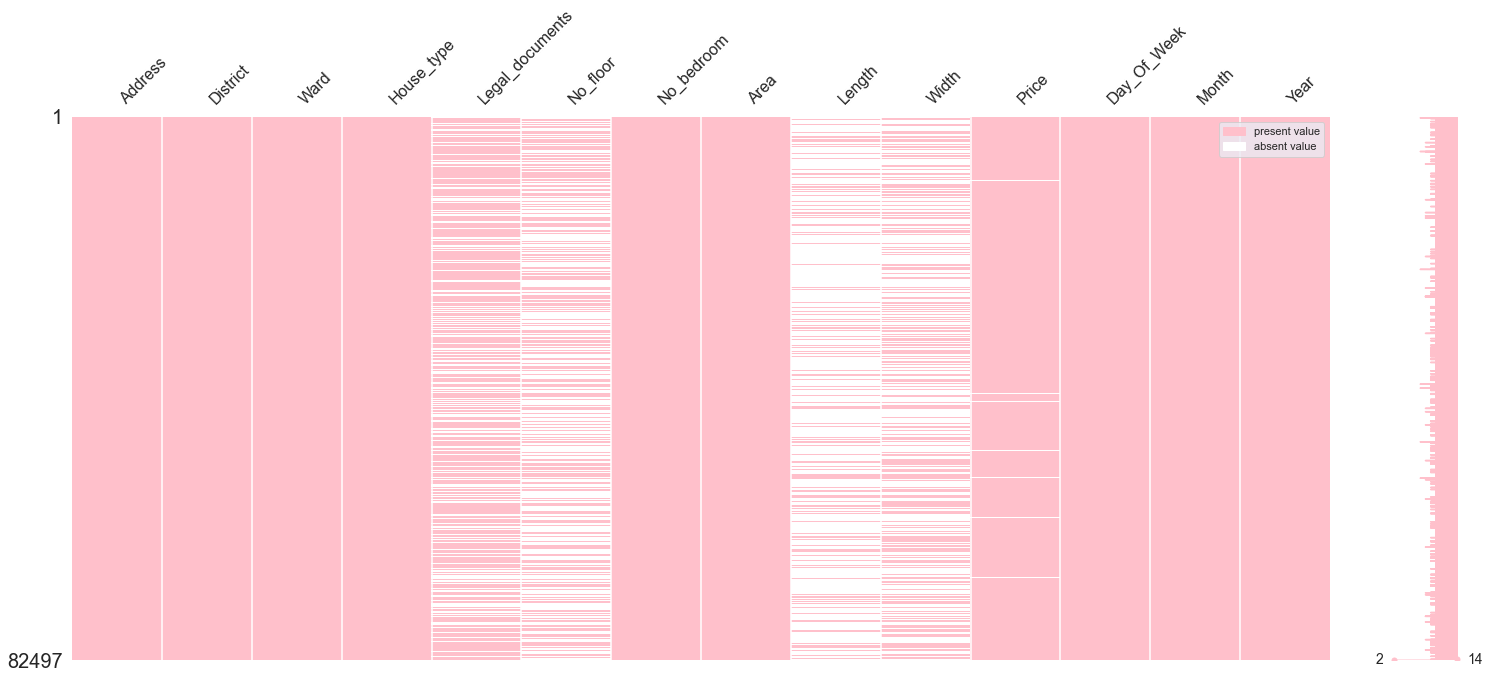

In [ ]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>

+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random due to a small number of missing values.

District             2      NaN
Area                 2      NaN
Date                 1      NaN
day_of_week          1      NaN


#### I'm going to delete any missing column that IS COMPLETELY AT RANDOM (MCAR) AND has small number of missing values.
#### From the graph, I can see a strong correlation the strong correlation between `Legal_documents`, `No_floor`, `Length` and `Width`.


<hr>

In [ ]:
# Pairwise delete the rows
df.dropna(subset=['District', 'Area', 'Day_Of_Week', 'Month', 'Year'], how='any', inplace=True)

<br><br>
<a id="2.2"></a>
# Task 2.2: Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype (string)¶
+ Numeric data should have for example the same number of digits after the point.

In [ ]:
print("The shape of the data BEFORE CONVERT is (row, column):", str(df.shape))
print("The data types BEFORE CONVERT are:", df.dtypes, "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df[['Month', 'Year']] = df[['Month', 'Year']].astype('int32', errors='ignore')


print("The shape of the data AFTER CONVERT is (row, column):", str(df.shape))
print("The data types AFTER CONVERT are:", df.dtypes, "\n\n")

The shape of the data BEFORE CONVERT is (row, column): (82494, 14)
The data types BEFORE CONVERT are: Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object 


The shape of the data AFTER CONVERT is (row, column): (82494, 14)
The data types AFTER CONVERT are: Address             string
District            string
Ward                string
House_type          string
Legal_documents     string
No_floor            string
No_bedroom          string
Area               Float64
Length             Float64
Width              Float64
Price              Float64
Day_Of_Week         string
Month                int32
Year                 int32
dtype: object 




In [ ]:
print("The dataframe BEFORE dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))

# If all values are NA, drop that row or column.
df.dropna(how='all', inplace=True)

# display missing values in descending
print("The dataframe AFTER dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

The dataframe BEFORE dropped has 82494 rows and 14 columns
The dataframe AFTER dropped has 82494 rows and 14 columns
Missing values in the dataframe in descending: 
                  Total  Percent
Length           62668    75.97
Width            47051    57.04
No_floor         46096    55.88
Legal_documents  28886    35.02
Price              869     1.05
Address             47     0.06
Ward                46     0.06
No_bedroom          38     0.05
House_type          31     0.04


In [ ]:
df['Day_Of_Week'].value_counts(dropna=False)

TUESDAY      14310
MONDAY       13888
WEDNESDAY    12459
THURSDAY     12425
FRIDAY       12170
SATURDAY     10669
SUNDAY        6573
Name: Day_Of_Week, dtype: Int64

In [ ]:
df['Month'].value_counts(dropna=False)

7     44807
6     29791
8      7542
5       196
4        59
3        51
2        36
10        6
12        3
11        2
9         1
Name: Month, dtype: int64

In [ ]:
df['Year'].value_counts(dropna=False)

2020    82476
2019       18
Name: Year, dtype: int64

In [ ]:
df['Legal_documents'].value_counts(dropna=False)

AVAILABLE    52912
NaN          28886
WAITING        356
OTHERS         340
Name: Legal_documents, dtype: Int64

In [ ]:
df['Legal_documents'].fillna("OTHERS", inplace=True)

In [ ]:
df['House_type'].value_counts(dropna=False)

BYROAD          62535
STREET_HOUSE    17095
TOWNHOUSE        1881
VILLA             952
NaN                31
Name: House_type, dtype: Int64

In [ ]:
mode = df['House_type'].mode()[0]
df['House_type'].fillna(mode, inplace=True)

In [ ]:
df[['Address', 'Ward', 'District']][df['District'].isna()]

,Address,Ward,District


In [ ]:
df[['Address', 'Ward', 'District']][df['Ward'].isna()]

,Address,Ward,District
174,<NA>,<NA>,NAM TỪ LIÊM
324,"ĐƯỜNG AN DƯƠNG VƯƠNG, QUẬN TÂY HỒ, HÀ NỘI",<NA>,TÂY HỒ
741,"CẦU KHÊ TANG, QUẬN HÀ ĐÔNG, HÀ NỘI",<NA>,HÀ ĐÔNG
4558,<NA>,<NA>,HUYỆN HOÀI ĐỨC
5282,<NA>,<NA>,LONG BIÊN
5295,<NA>,<NA>,LONG BIÊN
7169,<NA>,<NA>,HUYỆN THANH TRÌ
8584,<NA>,<NA>,THANH XUÂN
12595,<NA>,<NA>,HÀ ĐÔNG
14548,<NA>,<NA>,HÀ ĐÔNG


### ------> OBSERVATION

<hr>

> When appraising a property, specific factors like location are only crucial if that factor is significant enough (NOT too many categories). As you can see, the address point to many location fields like city, ward, and street. Hence, there is no particular ward because a street can have multiple wards. Thus, we should only fill the missing value with None. This will conclude that there is a small percentage of housing without a specific location. Thus, the price of these houses will strongly influence the district compared to the street and the ward location. Additionally, these data will not be as crucial as a house with a specific address because an abstract house or not detailed house might not be realistic for the model to learn.

<hr>

In [ ]:
df['Ward'].fillna("None", inplace=True)
df['Address'].fillna("None", inplace=True)
df['No_floor'].value_counts(dropna=False)

NaN                46096
5                  15769
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
10                    36
45                     8
GREATER_THAN_10        7
35                     6
38                     2
12                     2
50                     2
30                     1
32                     1
54                     1
52                     1
40                     1
14                     1
65                     1
55                     1
73                     1
25                     1
42                     1
33                     1
29                     1
Name: No_floor, dtype: Int64

In [ ]:
mode = df['No_floor'].mode()[0]
df['No_floor'].fillna(mode, inplace=True)

In [ ]:
# define a function to feed into the lambda
def No_floor_count(value):
    if value == '1' or value == '2' or value == '3' \
            or value == '4' or value == '5' or value == '6' \
            or value == '7' or value == '8' or value == '9' or value == '10':
        return value
    else:
        return 'GREATER_THAN_10'

df['No_floor'] = df['No_floor'].map(lambda n: No_floor_count(n))
df['No_floor'].value_counts(dropna=False)

5                  61865
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
GREATER_THAN_10       40
10                    36
Name: No_floor, dtype: int64

In [ ]:
df['No_bedroom'].value_counts(dropna=False)

4                  29069
3                  27162
5                   7924
2                   7330
6                   6461
1                   1388
8                    938
GREATER_THAN_10      869
7                    678
10                   354
9                    283
NaN                   38
Name: No_bedroom, dtype: Int64

In [ ]:
mode = df['No_bedroom'].mode()[0]
df['No_bedroom'].fillna(mode, inplace=True)

In [ ]:
#Different Location have different housing area
df['Area'] = df.groupby('District')['Area'].apply(lambda x: x.fillna(x.median()))
df['Price'] = df.groupby('District')['Price'].apply(lambda x: x.fillna(x.median()))

df['Length'] = df.groupby('Area')['Length'].apply(lambda x: x.fillna(x.median()))
df['Length'].fillna(df['Length'].mean(), inplace=True)
df['Width'] = df.groupby('Area')['Width'].apply(lambda x: x.fillna(x.median()))
df['Width'].fillna(df['Width'].mean(), inplace=True)

In [ ]:
# df['Street'] = df['Address'].str.split(',', expand=True)[0]
df['Street'] = df['Address'].str.replace('(, QUẬN|, PHƯỜNG|, HUYỆN|, HÀ NỘI).*', '', regex=True)
df['Street'] = df['Street'].str.replace('ĐƯỜNG\s', '', regex=True)
df['Street'] = df['Street'].str.replace('PHỐ\s', '', regex=True)

# print out list of Street types
print(f'NUMBER OF CATEGORIES: {df.Street.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Street.unique()}\n\n\n')

NUMBER OF CATEGORIES: 7378; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
[                           'HOÀNG QUỐC VIỆT',
                                  'KIM GIANG',
                                  'MINH KHAI',
                                   'VÕNG THỊ',
                                    'YÊN HÒA',
                                    'TÂY SƠN',
                                     'LÒ ĐÚC',
                                    'XUÂN LA',
                                       '19/5',
                'TỰU LIỆT, THỊ TRẤN VĂN ĐIỂN',
 ...
                              '02, XUÂN ĐỈNH',
                             '42, HOÀNG NGÂN',
                            'TỔ 23, HOA BẰNG',
 'SỐ 9 NGÕ 211/229, KHƯƠNG TRUNG, THANH XUÂN',
                        '25, 25 VŨ NGỌC PHAN',
                  '101B-C4, NGÕ 231, TÂN MAI',
                  'KHU B ĐẠI HỌC MỎ ĐỊA CHẤT',
                      'LÊ TRỌNG TẤN HOÀI ĐỨC',
                       'LẠC LONG QUÂN TÂY HỒ',
         'SỐ 7 ĐẠI LỘ THĂNG

In [ ]:
df.drop('Address', 1, inplace=True)

In [ ]:
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Year               0
Street             0
dtype: int64

In [ ]:
df['Year'].value_counts()

2020    82476
2019       18
Name: Year, dtype: int64

### ------> OBSERVATION

<hr>

> As you can see, the data for 2019 is only 10 rows. Thus, to narrow down our problem, we will only use the database from 2020 to analyse and predict the house price base. Additionally, we know that all the data is collect in 2020. Thus, we will also drop the column year.

<hr>

In [ ]:
df.drop(df.loc[df['Year']==2019].index, inplace=True)
df['Year'].value_counts()

2020    82476
Name: Year, dtype: int64

In [ ]:
df.drop('Year', 1, inplace=True)
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Street             0
dtype: int64

## Extra-whitespaces

In [ ]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

whitespace_remover(df)

### ----------> OBSERVATION
<hr>

> There is no typo left

<hr>

<br><br>
<a id="2.6"></a>
# 2.6 Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
<a id="2.6.1"></a>
### 2.6.1 Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [ ]:
# df
print("Number of rows before drop of duplicates  in df:", len(df.index))
print("Number of duplicated records in df: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in df:", len(df.index), "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df.info()

Number of rows before drop of duplicates  in df: 82476
Number of duplicated records in df:  1361
Number of rows after drop of duplicates in df: 81115 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81115 entries, 0 to 82477
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         81115 non-null  string 
 1   Ward             81115 non-null  string 
 2   House_type       81115 non-null  string 
 3   Legal_documents  81115 non-null  string 
 4   No_floor         81115 non-null  string 
 5   No_bedroom       81115 non-null  string 
 6   Area             81115 non-null  Float64
 7   Length           81115 non-null  Float64
 8   Width            81115 non-null  Float64
 9   Price            81115 non-null  Float64
 10  Day_Of_Week      81115 non-null  string 
 11  Month            81115 non-null  Int32  
 12  Street           81115 non-null  string 
dtypes: Float64(4), Int32(1), string(8)
memory u

In [ ]:
df.columns

Index(['District', 'Ward', 'House_type', 'Legal_documents', 'No_floor',
       'No_bedroom', 'Area', 'Length', 'Width', 'Price', 'Day_Of_Week',
       'Month', 'Street'],
      dtype='object')

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Checking for impossiple values</strong></h1>

# Descriptive statistics for Central Tendency Using Pandas

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,81115.0,51.544650,474.656056,1.0,34.00,40.0,50.00,111411.0
Length,81115.0,29.949469,3198.381909,1.0,9.00,10.0,12.00,900000.0
Width,81115.0,18.905477,2050.216069,1.0,4.00,4.0,4.30,423432.0
Price,81115.0,102.455002,63.263470,1.0,73.33,90.0,110.29,998.0
Month,81115.0,6.720360,0.640843,2.0,6.00,7.0,7.00,8.0


<AxesSubplot:>

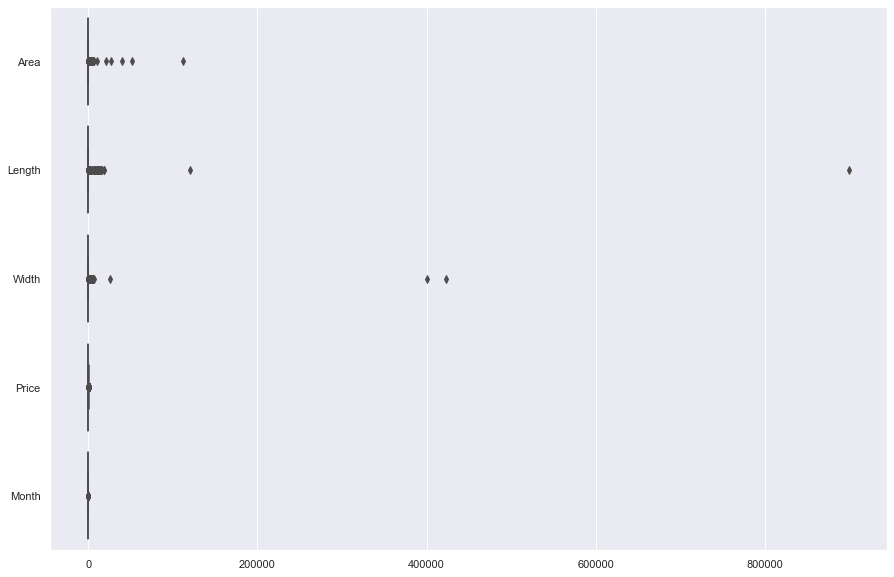

In [ ]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> For all numerical columns, I see some extreme outlier values in `Area`, `Length`, and `Width`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

### Interquartile Range

In [ ]:
q1_Price = df['Price'].quantile(.25)
q3_Price = df['Price'].quantile(.75)
iqr_Price = q3_Price - q1_Price

print("q1_Price:", q1_Price, "\n")
print("q3_Price:", q3_Price, "\n")
print("iqr_Price:", iqr_Price)

q1_Price: 73.33 

q3_Price: 110.29 

iqr_Price: 36.96000000000001


(0.0, 400.0)

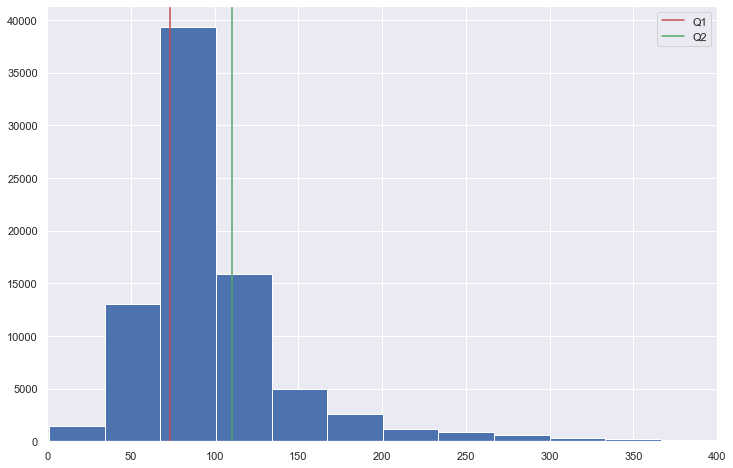

In [ ]:
plt.figure(figsize=(12, 8))

df['Price'].hist(bins=30)

plt.axvline(q1_Price, color='r', label='Q1')
plt.axvline(q3_Price, color='g', label='Q2')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,400)

### Standard Deviation

In [ ]:
Price_mean = df['Price'].mean()

Price_std = df['Price'].std()

print("Mean Price:", Price_mean, "\n")
print("Standard deviation Price:", Price_std, "\n")

Mean Price: 102.45500197250817 

Standard deviation Price: 63.263469753971414 



(0.0, 450.0)

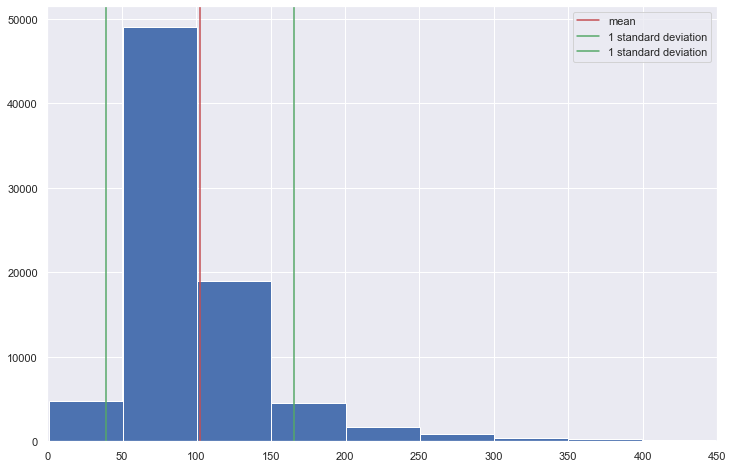

In [ ]:
plt.figure(figsize=(12, 8))

df['Price'].hist(bins=20)

plt.axvline(Price_mean, color='r', label='mean')

plt.axvline(Price_mean - Price_std, color='g', label='1 standard deviation')
plt.axvline(Price_mean + Price_std, color='g', label='1 standard deviation')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,450)

# Descriptive statistics for Variability Using Pandas

In [ ]:
Price_mean = df['Price'].mean()

Price_median = df['Price'].median()

Price_mode = df['Price'].mode().values[0]

(0.0, 550.0)

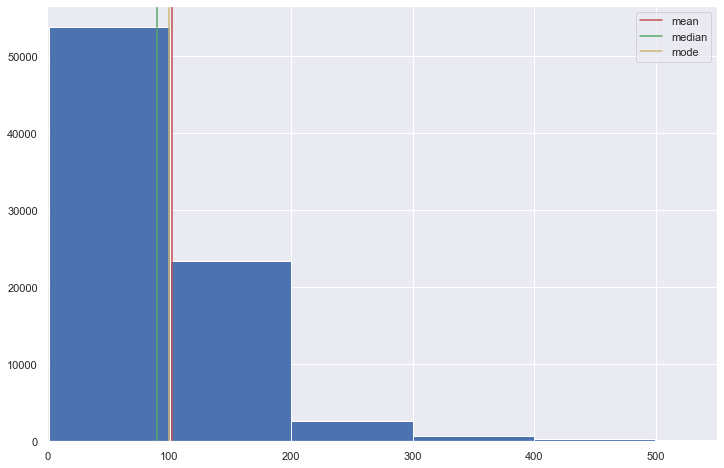

In [ ]:
plt.figure(figsize=(12, 8))

df['Price'].hist()

plt.axvline(Price_mean, color='r', label='mean')
plt.axvline(Price_median, color='g', label='median')
plt.axvline(Price_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
> The mean larger than the median indicates that the data is skewed to the right.

In [ ]:
House_type_counts = {}

for p in df['House_type']:
    if p not in House_type_counts:
        House_type_counts[p] = 1
    else:
        House_type_counts[p] += 1

House_type_counts

{'BYROAD': 61310, 'STREET_HOUSE': 16983, 'VILLA': 952, 'TOWNHOUSE': 1870}

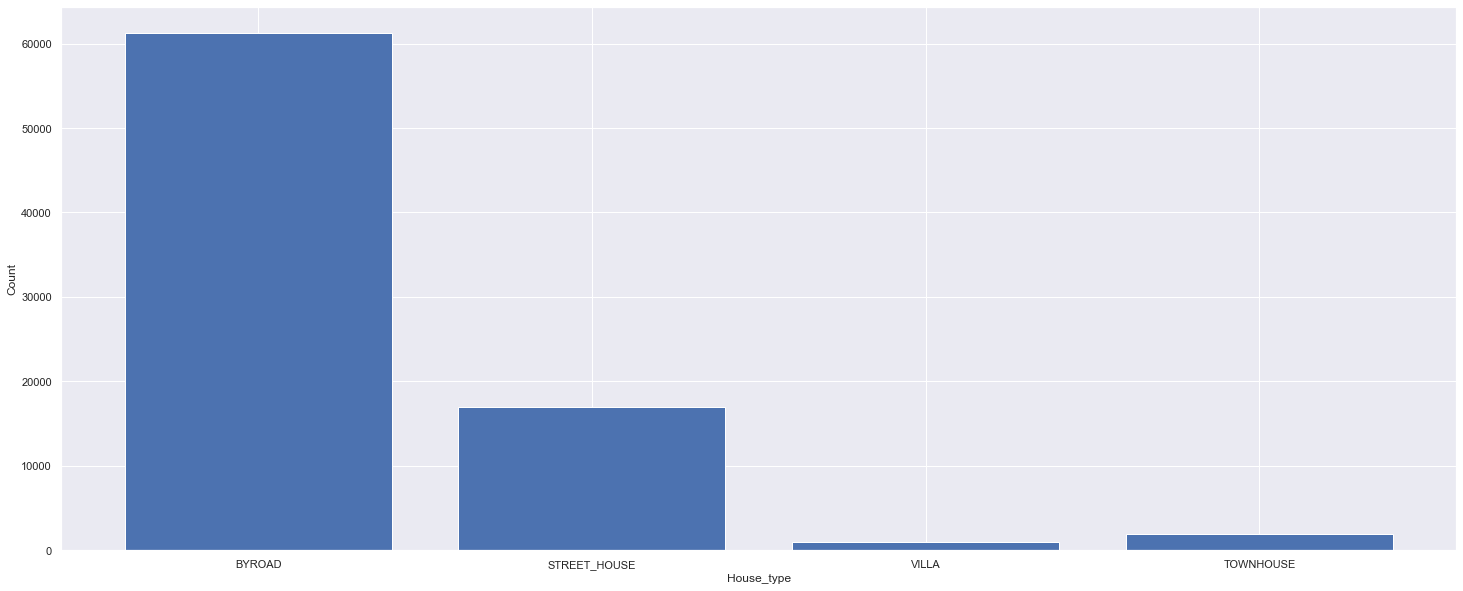

In [ ]:
plt.figure(figsize=(25, 10))

x_range = range(len(House_type_counts))

plt.bar(x_range, list(House_type_counts.values()), align='center')
plt.xticks(x_range, list(House_type_counts.keys()))

plt.xlabel('House_type')
plt.ylabel('Count')

plt.show()

### ---------> OBSERVATION
> BYROAD has the highest count of houses

In [ ]:
# Rules and policies for building houses in Hanoi is taken from Havaco VN website.

# houses in cities have area of 40 m2 will only have at most 5 floors. Therefore, we have to code filter the dataframe
# to exclude those who are not satisfy the condition.

# About townhouse policy:

#Townhouse can't be build more than 6 floors. Townhouse in alley smaller than 6m can't be more than 4 floors.
#Land for building with area from 30m2 to 40m2, house can be build no more than 4 floors and 1 attic.
#Land for building with area more than 50m2, houser can be build at most 6 floors.

#About street_house policy:

#Land for building with area from 15m2 to less than 30m2, house can be build at most 4 floors and 1 attic.
#Land for building with area from 30m2 to less than 40m2 , hosue can be build at most 4 floors and 1 attic.
#Land for building with area more than 50m2, house can be build at most 6 floors.

#Citation:
#Công ty TNHH Nội thất Havaco Việt Nam. 2021. Quy định chiều cao xây dựng nhà ở Hà Nội. [online] Available at: <https://havacovn.com/goc-tu-van/quy-dinh-chieu-cao-xay-dung-nha-o-ha-noi> [Accessed 26 December 2021].

In [ ]:
df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Street
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT
1,THANH XUÂN,KIM GIANG,STREET_HOUSE,OTHERS,5,3,37.0,10.0,4.0,116.22,WEDNESDAY,8,KIM GIANG
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.0,WEDNESDAY,8,MINH KHAI
3,TÂY HỒ,THỤY KHUÊ,BYROAD,AVAILABLE,5,6,51.0,12.75,4.0,100.0,WEDNESDAY,8,VÕNG THỊ
4,THANH XUÂN,KIM GIANG,BYROAD,OTHERS,5,4,36.0,9.0,4.0,86.11,WEDNESDAY,8,KIM GIANG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82473,HOÀNG MAI,YÊN SỞ,TOWNHOUSE,OTHERS,5,3,33.0,9.0,4.0,75.76,SUNDAY,2,TAM TRINH
82474,BA ĐÌNH,PHÚC XÁ,BYROAD,AVAILABLE,3,3,32.0,8.0,4.0,375.0,SUNDAY,2,HỒNG HÀ
82475,HAI BÀ TRƯNG,MINH KHAI,TOWNHOUSE,AVAILABLE,5,3,32.0,8.0,4.0,76.56,SATURDAY,2,MINH KHAI
82476,NAM TỪ LIÊM,MỄ TRÌ,STREET_HOUSE,OTHERS,5,6,38.0,10.0,4.0,84.21,SATURDAY,2,MỄ TRÌ THƯỢNG


In [ ]:
#1st policy for town houses:
df = df[df.No_floor != 'GREATER_THAN_10']

In [ ]:
#1st policy for town houses:
index_townHouses = df[ (df['No_floor'].astype(int) > 6) ].index

# drop these given row
df.drop(index_townHouses, inplace = True)

#2nd policy for town houses with area from 30ms to less than 40m2:
index_townHouses2 = df[ (df['Area'].astype(int) >= 30) & (df['Area'].astype(int) < 40) & (df['No_floor'].astype(int) > 4)].index

df.drop(index_townHouses2, inplace = True)

#3rd policy for town houses with area more than 50m2:
index_townHouses3 = df[ (df['Area'].astype(int) > 50) ].index

df.drop(index_townHouses3, inplace = True)

df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Street
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.0,WEDNESDAY,8,MINH KHAI
5,CẦU GIẤY,YÊN HOÀ,BYROAD,AVAILABLE,5,GREATER_THAN_10,46.0,12.1,3.8,104.35,WEDNESDAY,8,YÊN HÒA
9,HÀ ĐÔNG,VĂN QUÁN,BYROAD,AVAILABLE,4,3,41.0,10.0,3.5,64.63,WEDNESDAY,8,19/5
13,HÀ ĐÔNG,QUANG TRUNG,BYROAD,OTHERS,5,5,50.0,11.0,5.0,86.0,WEDNESDAY,8,QUANG TRUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82469,THANH XUÂN,PHƯƠNG LIỆT,STREET_HOUSE,AVAILABLE,5,4,45.0,11.0,4.0,88.89,WEDNESDAY,2,NGUYỄN LÂN
82470,HOÀNG MAI,ĐỊNH CÔNG,BYROAD,AVAILABLE,5,6,45.0,11.0,4.0,96.67,TUESDAY,2,ĐỊNH CÔNG THƯỢNG
82471,ĐỐNG ĐA,NAM ĐỒNG,TOWNHOUSE,AVAILABLE,5,6,50.0,11.0,4.0,290.0,MONDAY,2,HÀO NAM
82472,THANH XUÂN,KHƯƠNG ĐÌNH,TOWNHOUSE,AVAILABLE,4,4,42.0,10.0,4.0,71.43,MONDAY,2,BÙI XƯƠNG TRẠCH


In [ ]:
#1st policy for street houses:
index_streetHouses = df[( df['Area'].astype(int) >= 15) & (df['Area'].astype(int) < 30) & (df['No_floor'].astype(int) > 4)].index

# drop these given row
df.drop(index_streetHouses, inplace = True)

#2nd policy for street houses:
index_streetHouses2 = df[ (df['Area'].astype(int) >= 30) & (df['Area'].astype(int) < 40) & (df['No_floor'].astype(int) > 4)].index

df.drop(index_streetHouses2, inplace = True)

#3rd policy for street houses:
index_streetHouses3 = df[( df['Area'].astype(int) > 50) & (df['No_floor'].astype(int) > 6)].index

df.drop(index_streetHouses3, inplace = True)

df.head(3)

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Street
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.0,WEDNESDAY,8,MINH KHAI
5,CẦU GIẤY,YÊN HOÀ,BYROAD,AVAILABLE,5,GREATER_THAN_10,46.0,12.1,3.8,104.35,WEDNESDAY,8,YÊN HÒA


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Data exploration (EDA)</strong></h1>


## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings

6. Additional Reading Resources

### Bivariate Analysis

<AxesSubplot:xlabel='Length', ylabel='Price'>

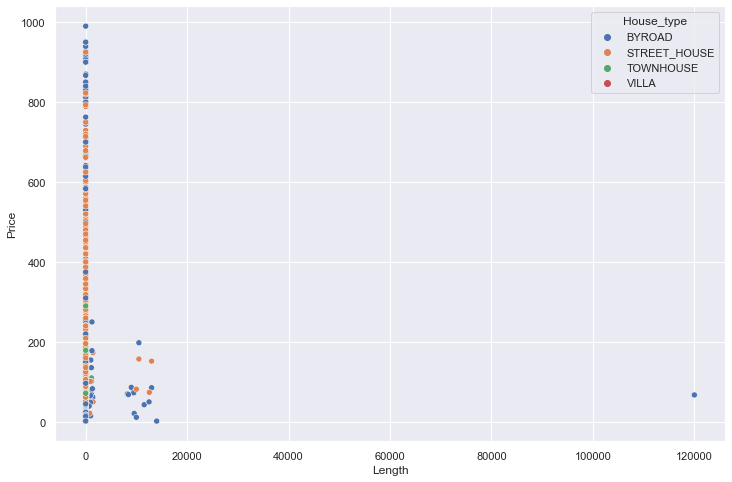

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x = "Length", y = "Price", hue='House_type', data=df)

### ---------> OBSERVATION
> There is 1 extreme outlier in the dataset for the `Length` attribute that > 8000000 meter.

### Multivariate data analysis

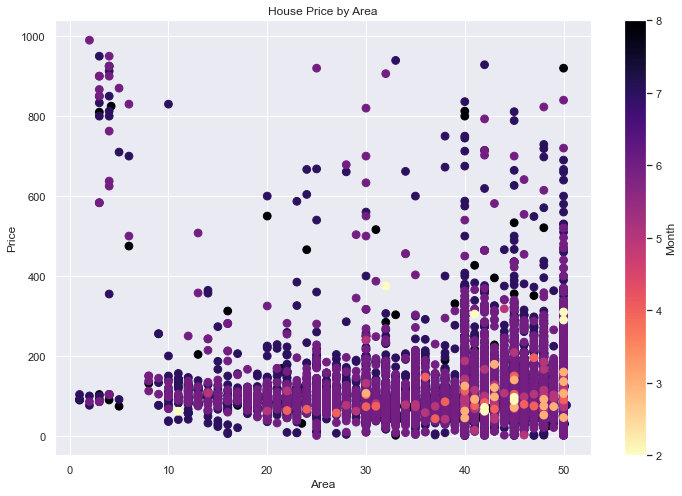

In [ ]:
fig, ax = plt.subplots()

df.plot(x='Area', y='Price',
                     kind='scatter', s=60, c='Month',
                     cmap='magma_r', title='House Price by Area',
                     figsize=(12, 8), ax=ax)

plt.show()

### ---------> OBSERVATION
> There are outliers from the range of 20000 to 20000 meter square for the Area column

# Date visualization

### Number of houses for Day Of Week by Types

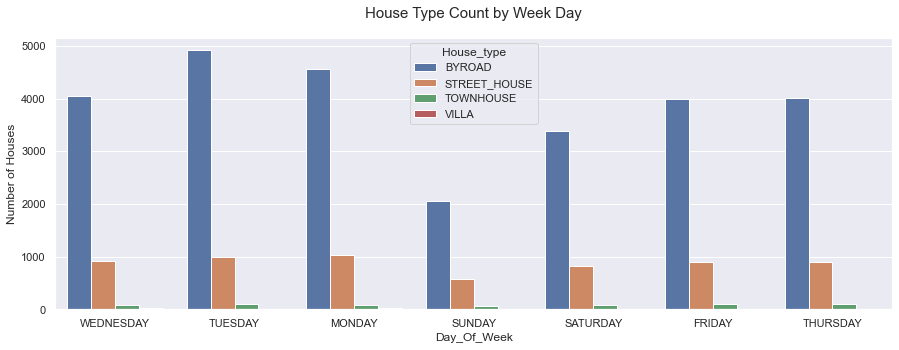

In [ ]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Day_Of_Week', hue='House_type', data=df)

# set the ticks, labels and title
plt.title('House Type Count by Week Day', size=15, y=1.05)
plt.ylabel("Number of Houses")

# show plot
plt.show()

### ---------> OBSERVATION
> The most houses were recorded on Tuesday, and the BYROAD house is the most popular house type.

### Number of houses for Month by Types

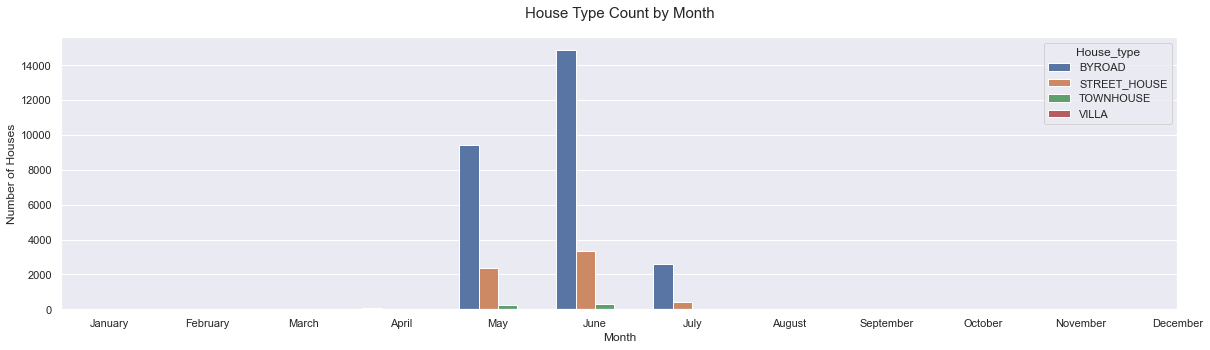

In [ ]:
# import calendar for getting the month and week names
import calendar

# define the plot size
plt.figure(figsize=(20, 5))

# create count plot for severity for each month
sns.countplot(x='Month', hue='House_type', data=df)

# set itle, labels and ticks
plt.title('House Type Count by Month', size=15, y=1.05)
plt.ylabel("Number of Houses")
plt.xticks(np.arange(0, 12, 1), calendar.month_name[1:13])

#show plot
plt.show()

### ---------> OBSERVATION
> Surprisingly, significantly higher houses were recorded from May to July, and the BYROAD house is the most popular house type.

### Number Houses for Year By Types

In [ ]:
# # define the figure size
# plt.figure(figsize=(15, 5))

# # create count plot for severity for each year
# sns.countplot(x='Year', hue='House_type', data=df)

# # set the ticks, labels and title
# plt.title('House Type Count by Year', size=15, y=1.05)
# plt.ylabel("Number of Houses")

# # show plot
# plt.show()

### ---------> OBSERVATION
> Significantly higher houses were recorded in 2020. The BYROAD house is the most popular and the VILLA is the least popular house type might due to their expensive price.

# FacetGrid
* We first initialise a FacetGrid object with a dataframe
* Specify the row, column and hue parameters
* Every unique value of the categorical variable is then used to create a facet along the specified axis.
* A plotting function is applied to each subset by using a map function


(0.0, 10000.0)

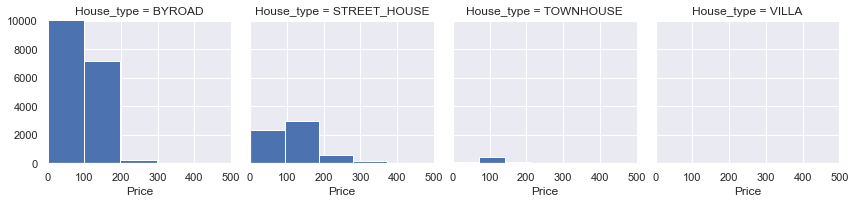

In [ ]:
g=sns.FacetGrid(df,col="House_type")
g.map(plt.hist,"Price")

plt.xlim(0,500)
plt.ylim(0,10000)

### ---------> OBSERVATION

> We have called the plt.hist function to plot a histogram for the count and total price for the different types of house types in Hanoi.

> It is clear that the STREET house type has the highest price. It has the maximum interaction in the form of all types. The histogram shows that the price between 0 and 300 has the largest area, implying highest price.

> All houses have more likely to have prices in the range of 50 to 300.

> The houses with a STREET house type are more popular than those with VILLA, BYROAD, or TOWNHOUSE types.

#### We now pass multiple variables to make a relational Scatterplot.

#### Adding a legend to show what the colors stand for
We have added "alpha=0.7" to reduce the opacity of the points in the scatterplot.
It is 1 by default. Making it closer to 0 makes it more transparent.

(0.0, 5000.0)

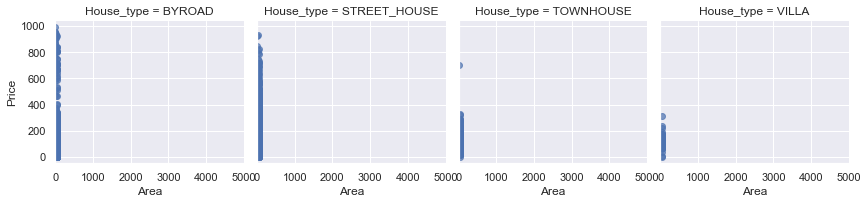

In [ ]:
g=sns.FacetGrid(df, col="House_type")
g.map(plt.scatter,"Area", "Price", alpha=0.7)

g.add_legend()

plt.xlim(0,5000)
# plt.ylim(0,10000)

### ---------> OBSERVATION
> In the range of 0 to 5000 meter square, the STREET house type has the highest price and the BYROAD has larger area than others

In [ ]:
# #Creating a dictionary for markers and passing it to hue_kws variable
# h={0:"pink",1:"blue"}
# i={"marker":["^","v"]}

# g=sns.FacetGrid(df,row="Year",
#                 col="House_type",
#                 # hue="Area",
#                 margin_titles=True,
#                 palette=h,
#                 hue_kws=i)

# g.map(sns.regplot,"Area","Price",fit_reg=False)

# g.add_legend()
# plt.xlim(0,1000)

### ---------> OBSERVATION
> In the range of 0 to 1000 meter square, the STREET and BYROAD house types have the highest price and the larger area than others in 2020
> In 2019, a significant portion of the houses were recorded in the range of 0 to 400 meter square.

> We see that the points are plotted with the specified markers. As we have also specified colours, we see that the markers are in accordance with the passed in color scheme



# Bar plot,

*We simply pass in an ordered list to the corresponding parameter, for eg, row_order, hue_order, etc.* <br>
By default, the variables are ordered in ascending order if they are numbers, and in the order of appearance otherwise.

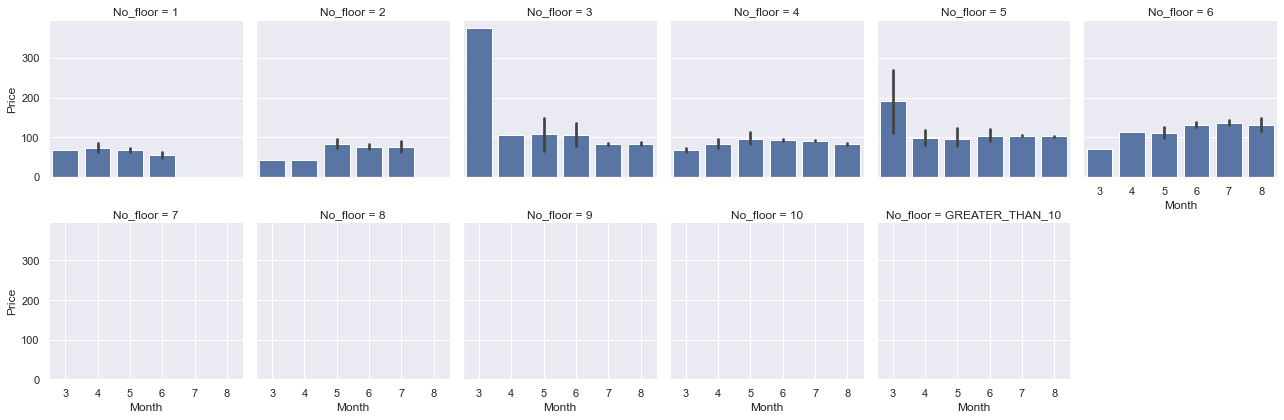

In [ ]:
g=sns.FacetGrid(df,col="No_floor", col_order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "GREATER_THAN_10"], col_wrap=6)

g.map(sns.barplot,"Month","Price")

### We have to zoom in into each graph if we want to understand this. Do we have a way to make them of readable size and position them better?

In [ ]:
# g=sns.FacetGrid(df, col="District", col_wrap=6)
# g.map(sns.barplot,"Year","Price")

### ---------> OBSERVATION
> Hoan Kiem district has the highest house price in the year 2020.

In [ ]:
# The most common Ward

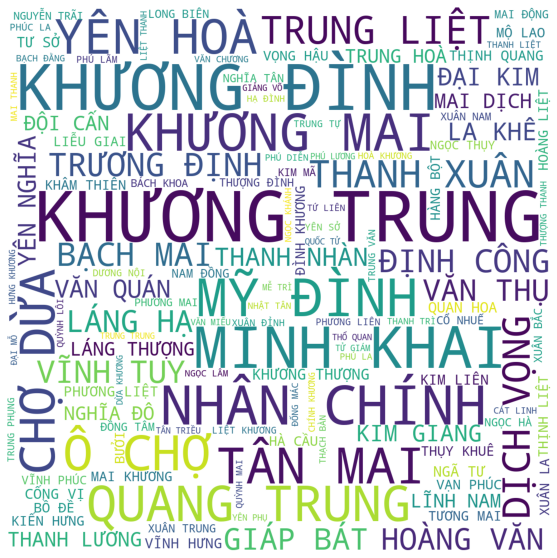

In [ ]:
from wordcloud import WordCloud

"""
Word Cloud¶:
get the most common words in the address field to later simplify them.
"""

text = str(list(df['Ward'])).replace(',', '').replace(';', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 122).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### ---------> OBSERVATION
> Khuong Truong and Khuong Dinh are the most common wards in the dataset.

<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. Feature Engineering</strong></h1>

### Create categorical price

In [ ]:
df['Price'].describe()

count    33777.000000
mean        97.554595
std         54.322332
min          1.000000
25%         72.500000
50%         87.780000
75%        107.500000
max        990.000000
Name: Price, dtype: float64

<AxesSubplot:>

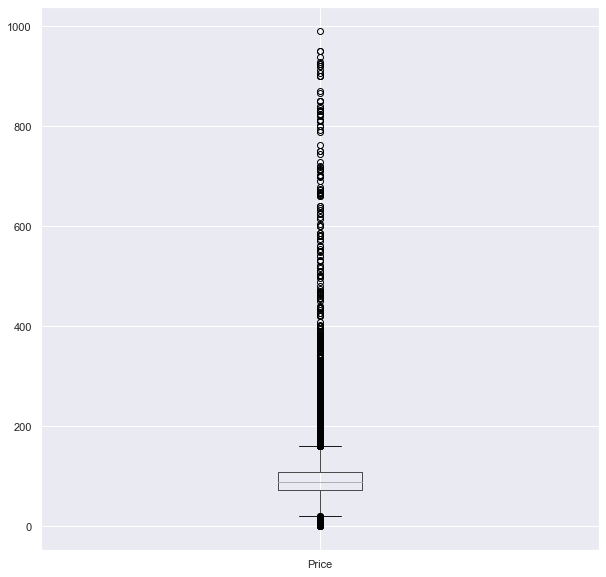

In [ ]:
df.boxplot('Price')

In [ ]:
df.loc[df['Price'].between(1, 61, inclusive=True), 'Price_range'] = '1-60'
df.loc[df['Price'].between(61, 71, inclusive=True), 'Price_range'] = '61-70'
df.loc[df['Price'].between(71, 81, inclusive=True), 'Price_range'] = '71-80'
df.loc[df['Price'].between(81, 91, inclusive=True), 'Price_range'] = '81-90'
df.loc[df['Price'].between(91, 101, inclusive=True), 'Price_range'] = '91-100'
df.loc[df['Price'].between(101, 201, inclusive=True), 'Price_range'] = '101-200'
df.loc[df['Price'].between(201, 301, inclusive=True), 'Price_range'] = '201-300'
df.loc[df['Price'].between(301, 1001, inclusive=True), 'Price_range'] = '301-1000'

### Class Imbalances
+ class separability! When is it appropriate to use rebalancing methods?

In [ ]:
df['Price_range'].value_counts()

101-200     9412
71-80       5598
81-90       5247
91-100      4843
1-60        3922
61-70       3825
201-300      638
301-1000     292
Name: Price_range, dtype: int64

In [ ]:
df['Price_range'].value_counts(normalize=True, dropna=False)

101-200     0.278651
71-80       0.165734
81-90       0.155342
91-100      0.143382
1-60        0.116115
61-70       0.113243
201-300     0.018889
301-1000    0.008645
Name: Price_range, dtype: float64

### Encoding

In [ ]:
df.head(3)

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Street,Price_range
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT,81-90
2,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.0,WEDNESDAY,8,MINH KHAI,61-70
5,CẦU GIẤY,YÊN HOÀ,BYROAD,AVAILABLE,5,GREATER_THAN_10,46.0,12.1,3.8,104.35,WEDNESDAY,8,YÊN HÒA,101-200


In [ ]:
# create a function to encoding the categorical value
def to_one_hot_encoder(df, column_name):
    # we will set the drop to be if_binary so that we can delete an encoded column if that column have a binary cateogircal value such as true/false, yes/no
    ohe = OneHotEncoder(sparse=False, handle_unknown='error', drop='if_binary')
    
    # get the column and encoding it into dataframe
    data = ohe.fit_transform(df[[column_name]])
    
    # create the dataframe base on data and the value will be integer
    encode_df = pd.DataFrame(data=data, columns=ohe.get_feature_names([column_name]), dtype=int)
    
    # add the encoding dataframe back to the dataframe
    df.reset_index(inplace=True, drop=True)
    df = pd.concat([df, encode_df], axis=1)
    
    # remove the original column
    df.drop([column_name], inplace=True, axis=1)

    return df

In [ ]:
!{sys.executable} -m pip install category_encoders
# pip install --upgrade category_encoders
import category_encoders as ce

# this is binary encode where it will encode categorical variable similar to onehot encoding but store categories as binary bitstrings
# this will save the amount of column compare to use the onehot encoding method which will save column space
def binary_encode(df, column_name):
    binary = ce.BinaryEncoder()
    # get the column and encoding it into dataframe
    data = binary.fit_transform(df[[column_name]])
    
    # add the new column back to the original dataframe
    df = pd.concat([df, data], axis=1)

    # remove the original column
    df.drop([column_name], inplace=True, axis=1)
    return df

In [ ]:
# create a function to encoding the value
def to_label_encoder(df, column, category):
    oe = OrdinalEncoder(categories=[category])
    # get the column and encoding it into dataframe
    data = oe.fit_transform(df[[column]])
    # create the dataframe base on data and the value will be integer
    encode_df = pd.DataFrame(data=data, columns=[column], dtype=int)
    # add the encoding dataframe back to the dataframe
    df[column] = encode_df.values

In [ ]:
# df[df['Street'] == '&&&']
# df[df['Street'] == '....']
# df[df['Street'] == '+']
# df[df['Street'] == '---']
# df[df['Street'] == '']
# # df[df['Street'] == '(']
df.drop('Street', 1, inplace=True)

In [ ]:
# df = to_one_hot_encoder(df, 'Street')
df = to_one_hot_encoder(df, 'District')
df = to_one_hot_encoder(df, 'Ward')
df = to_one_hot_encoder(df, 'House_type')
df = to_one_hot_encoder(df, 'Legal_documents')
# df = to_one_hot_encoder(df, 'isUrban')
# df = to_one_hot_encoder(df, 'isSafe')
df = to_one_hot_encoder(df, 'Day_Of_Week')

In [ ]:
df.columns

Index(['No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price', 'Month',
       'Price_range', 'District_BA ĐÌNH', 'District_BẮC TỪ LIÊM',
       ...
       'Legal_documents_AVAILABLE', 'Legal_documents_OTHERS',
       'Legal_documents_WAITING', 'Day_Of_Week_FRIDAY', 'Day_Of_Week_MONDAY',
       'Day_Of_Week_SATURDAY', 'Day_Of_Week_SUNDAY', 'Day_Of_Week_THURSDAY',
       'Day_Of_Week_TUESDAY', 'Day_Of_Week_WEDNESDAY'],
      dtype='object', length=266)

In [ ]:
lst_No_bedroom = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'GREATER_THAN_10']

to_label_encoder(df, 'No_bedroom', lst_No_bedroom)
to_label_encoder(df, 'No_floor', lst_No_bedroom)

lst_Price_range = ['1-60', '61-70', '71-80', '81-90', '91-100', '101-200', '201-300', '301-1000']

to_label_encoder(df, 'Price_range', lst_Price_range)

In [ ]:
df.head(3)

,No_floor,No_bedroom,Area,Length,Width,Price,Month,Price_range,District_BA ĐÌNH,District_BẮC TỪ LIÊM,District_CẦU GIẤY,District_HAI BÀ TRƯNG,District_HOÀN KIẾM,District_HOÀNG MAI,District_HUYỆN CHƯƠNG MỸ,District_HUYỆN GIA LÂM,District_HUYỆN HOÀI ĐỨC,District_HUYỆN PHÚC THỌ,District_HUYỆN SÓC SƠN,District_HUYỆN THANH OAI,District_HUYỆN THANH TRÌ,District_HUYỆN THƯỜNG TÍN,District_HUYỆN ĐAN PHƯỢNG,District_HUYỆN ĐÔNG ANH,District_HÀ ĐÔNG,District_LONG BIÊN,District_NAM TỪ LIÊM,District_THANH XUÂN,District_TÂY HỒ,District_ĐỐNG ĐA,Ward_AN KHÁNH,Ward_AN THƯỢNG,Ward_BIÊN GIANG,Ward_BÁCH KHOA,Ward_BÁT TRÀNG,Ward_BÍCH HÒA,Ward_BÙI THỊ XUÂN,Ward_BƯỞI,Ward_BẠCH MAI,Ward_BẠCH ĐẰNG,Ward_BẮC HỒNG,Ward_BỒ ĐỀ,Ward_CHƯƠNG DƯƠNG,Ward_CÁT LINH,Ward_CẦU DIỄN,Ward_CẦU DỀN,Ward_CỐNG VỊ,Ward_CỔ BI,Ward_CỔ NHUẾ 1,Ward_CỔ NHUẾ 2,Ward_CỬA NAM,Ward_CỬA ĐÔNG,Ward_CỰ KHÊ,Ward_CỰ KHỐI,Ward_DI TRẠCH,Ward_DƯƠNG NỘI,Ward_DƯƠNG QUANG,Ward_DỊCH VỌNG,Ward_DỊCH VỌNG HẬU,Ward_DỤC TÚ,Ward_GIA THỤY,Ward_GIANG BIÊN,Ward_GIÁP BÁT,Ward_GIẢNG VÕ,Ward_HOÀNG LIỆT,Ward_HOÀNG VĂN THỤ,Ward_HÀ CẦU,Ward_HÀNG BUỒM,Ward_HÀNG BÀI,Ward_HÀNG BÔNG,Ward_HÀNG BẠC,Ward_HÀNG BỒ,Ward_HÀNG BỘT,Ward_HÀNG GAI,Ward_HÀNG MÃ,Ward_HÀNG ĐÀO,Ward_HẠ ĐÌNH,Ward_HẢI BỐI,Ward_HỮU HOÀ,Ward_KHÂM THIÊN,Ward_KHƯƠNG MAI,Ward_KHƯƠNG THƯỢNG,Ward_KHƯƠNG TRUNG,Ward_KHƯƠNG ĐÌNH,Ward_KIM CHUNG,Ward_KIM GIANG,Ward_KIM LIÊN,Ward_KIM MÃ,Ward_KIÊU KỴ,Ward_KIẾN HƯNG,Ward_LA KHÊ,Ward_LA PHÙ,Ward_LIÊN MẠC,Ward_LIÊN NINH,Ward_LIỄU GIAI,Ward_LONG BIÊN,Ward_LÁNG HẠ,Ward_LÁNG THƯỢNG,Ward_LÊ ĐẠI HÀNH,Ward_LÝ THÁI TỔ,...,Ward_THANH XUÂN BẮC,Ward_THANH XUÂN NAM,Ward_THANH XUÂN TRUNG,Ward_THÀNH CÔNG,Ward_THƯỢNG CÁT,Ward_THƯỢNG THANH,Ward_THƯỢNG ĐÌNH,Ward_THẠCH BÀN,Ward_THỊ TRẤN PHÙNG,Ward_THỊ TRẤN TRÂU QUỲ,Ward_THỊ TRẤN TRẠM TRÔI,Ward_THỊ TRẤN VĂN ĐIỂN,Ward_THỊ TRẤN ĐÔNG ANH,Ward_THỊNH LIỆT,Ward_THỊNH QUANG,Ward_THỔ QUAN,Ward_THỤY KHUÊ,Ward_THỤY PHƯƠNG,Ward_TRUNG HOÀ,Ward_TRUNG LIỆT,Ward_TRUNG PHỤNG,Ward_TRUNG TỰ,Ward_TRUNG VĂN,Ward_TRÀNG TIỀN,Ward_TRÚC BẠCH,Ward_TRƯƠNG ĐỊNH,Ward_TRẦN HƯNG ĐẠO,Ward_TRẦN PHÚ,Ward_TÂN HỘI,Ward_TÂN LẬP,Ward_TÂN MAI,Ward_TÂN TRIỀU,Ward_TÂY MỖ,Ward_TÂY TỰU,Ward_TƯƠNG MAI,Ward_TẢ THANH OAI,Ward_TỨ HIỆP,Ward_TỨ LIÊN,Ward_UY NỖ,Ward_VIỆT HƯNG,Ward_VÂN CANH,Ward_VÂN CÔN,Ward_VÂN TẢO,Ward_VÕNG LA,Ward_VĂN CHƯƠNG,Ward_VĂN MIẾU,Ward_VĂN QUÁN,Ward_VĨNH HƯNG,Ward_VĨNH NGỌC,Ward_VĨNH PHÚC,Ward_VĨNH QUỲNH,Ward_VĨNH TUY,Ward_VẠN PHÚC,Ward_XUÂN LA,Ward_XUÂN PHƯƠNG,Ward_XUÂN TẢO,Ward_XUÂN ĐỈNH,Ward_YÊN HOÀ,Ward_YÊN NGHĨA,Ward_YÊN PHỤ,Ward_YÊN SỞ,Ward_YÊN VIÊN,Ward_YẾT KIÊU,Ward_Ô CHỢ DỪA,Ward_ĐA TỐN,Ward_ĐAN PHƯỢNG,Ward_ĐIỆN BIÊN,Ward_ĐÔNG DƯ,Ward_ĐÔNG HỘI,Ward_ĐÔNG LA,Ward_ĐÔNG MỸ,Ward_ĐÔNG NGẠC,Ward_ĐẠI KIM,Ward_ĐẠI MỖ,Ward_ĐẠI YÊN,Ward_ĐẠI ÁNG,Ward_ĐẶNG XÁ,Ward_ĐỊNH CÔNG,Ward_ĐỐNG MÁC,Ward_ĐỒNG MAI,Ward_ĐỒNG NHÂN,Ward_ĐỒNG TÂM,Ward_ĐỘI CẤN,Ward_ĐỨC GIANG,Ward_ĐỨC THƯỢNG,Ward_ĐỨC THẮNG,House_type_BYROAD,House_type_STREET_HOUSE,House_type_TOWNHOUSE,House_type_VILLA,Legal_documents_AVAILABLE,Legal_documents_OTHERS,Legal_documents_WAITING,Day_Of_Week_FRIDAY,Day_Of_Week_MONDAY,Day_Of_Week_SATURDAY,Day_Of_Week_SUNDAY,Day_Of_Week_THURSDAY,Day_Of_Week_TUESDAY,Day_Of_Week_WEDNESDAY
0,3,4,46.0,11.0,4.0,86.96,8,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,3,3,40.0,10.0,4.0,65.0,8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,4,10,46.0,12

### SMOTE 
+ The following is from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
+ Only on the data you use to train your model!
i.e. Don't make predictions on synthetic data

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop('Price_range', axis=1)
y = df.Price_range

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42) 

print(X_train.shape, y_train.shape)

(23643, 265) (23643,)


In [ ]:
y_train.value_counts()

5    6515
2    3962
3    3686
4    3413
0    2743
1    2689
6     438
7     197
Name: Price_range, dtype: int64

In [ ]:
# !pip install imbalanced-learn
# from imblearn.over_sampling import SMOTE
# import sklearn.datasets as datasets
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
#
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.neighbors import DistanceMetric
# from imblearn.over_sampling import SMOTE
#
# oversample = SMOTE()
#
# X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)
#
# print(X_train_smote.shape, y_train_smote.shape)

In [ ]:
# y_train_smote.value_counts()

In [ ]:
# model = RandomForestClassifier()
# model.fit(X_train_smote,y_train_smote)

In [ ]:
# # note predictions are on the non-smoted data!!!
#
# train_preds = model.predict(X_train)
# test_preds = model.predict(X_test)

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
#
# plot_confusion_matrix(model, X_train, y_train, ax=ax[0])
# plot_confusion_matrix(model, X_test, y_test, ax=ax[1])
# ax[0].grid(False)
# ax[1].grid(False)

In [ ]:
!pip install delayed

from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('ss', StandardScaler()),
                     ('RF', RandomForestClassifier(random_state=42))])

pipeline.fit(X_train, y_train)

ImportError: cannot import name 'delayed' from 'sklearn.utils.fixes' (C:\Users\Thu\anaconda3\envs\as2\lib\site-packages\sklearn\utils\fixes.py)

In [ ]:
from sklearn.metrics import classification_report

train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

print(classification_report(y_train, train_preds))
print(classification_report(y_test, test_preds))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 8))
plot_confusion_matrix(pipeline, X_train, y_train, ax=ax0)
plot_confusion_matrix(pipeline, X_test, y_test, ax=ax1)
ax0.title.set_text('Train Confusion Matrix')
ax1.title.set_text('Test Confusion Matrix')

In [ ]:
import pickle

# make sure your model has already been fit before you pickle it!!
pickle.dump(pipeline, open("model.pkl", "wb"))

# Conclusions
+ Procedural Programming: hard coded values and parameters, save multiple objects or data structure